In [1]:
### This notebook gives examples for how to use each of the three classes in the repository

In [2]:
import sys
import numpy as np
from matplotlib import pyplot as plt

In [3]:
# Load Example Power Spectrum
klin, plin= np.loadtxt('./ds14_a_1.0000_pk.dat').T

In [4]:
# Import Libraries
from zeldovich_rsd_recon_fftw import Zeldovich_Recon

In [5]:
# Make Instance
zelda = Zeldovich_Recon(klin,plin,R=15)

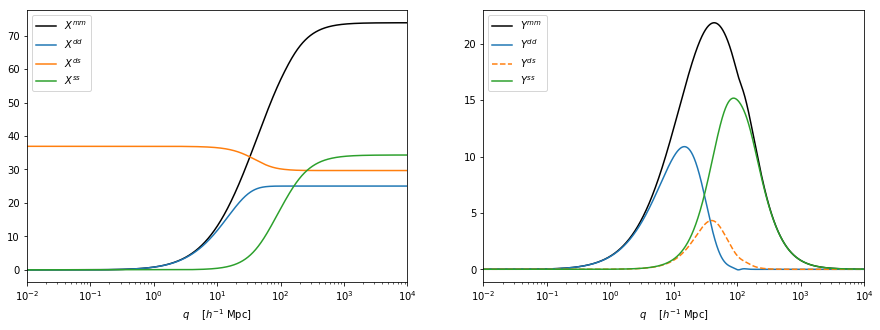

In [6]:
# We can plot the various two point functions:
fig = plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.semilogx(zelda.qint, zelda.Xlins['mm'],'k',label=r'$X^{mm}$')
plt.semilogx(zelda.qint, zelda.Xlins['dd'],label=r'$X^{dd}$')
plt.semilogx(zelda.qint, zelda.Xlins['ds'],label=r'$X^{ds}$')
plt.semilogx(zelda.qint, zelda.Xlins['ss'],label=r'$X^{ss}$')
plt.legend()
plt.xlim(1e-2,1e4)
plt.xlabel(r'$q\quad$ [$h^{-1}$ Mpc]')

plt.subplot(1,2,2)
plt.semilogx(zelda.qint, zelda.Ylins['mm'],'k',label=r'$Y^{mm}$')
plt.semilogx(zelda.qint, zelda.Ylins['dd'],label=r'$Y^{dd}$')
plt.semilogx(zelda.qint, -zelda.Ylins['ds'],'--',label=r'$Y^{ds}$')
plt.semilogx(zelda.qint, zelda.Ylins['ss'],label=r'$Y^{ss}$')
plt.legend(loc='upper left')
plt.xlim(1e-2,1e4)
plt.xlabel(r'$q\quad$ [$h^{-1}$ Mpc]')

plt.show()

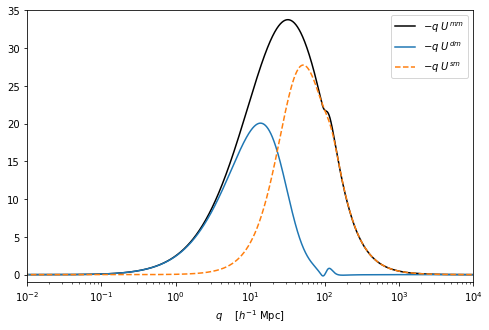

In [7]:
fig = plt.figure(figsize=(8,5))

plt.semilogx(zelda.qint,-zelda.qint*zelda.Ulins['mm'],'k',label=r'$-q\ U^{mm}$')
plt.semilogx(zelda.qint,-zelda.qint*zelda.Ulins['dm'],label=r'$-q\ U^{dm}$')
plt.semilogx(zelda.qint,zelda.qint*zelda.Ulins['sm'],'--',label=r'$-q\ U^{sm}$')
plt.xlim(0.001,3000)
plt.ylim(-1,35)
plt.legend()
plt.xlim(1e-2,1e4)
plt.xlabel(r'$q\quad$ [$h^{-1}$ Mpc]')

plt.show()



In [8]:
# Now Compute the Power Spectrum Multipoles
# This can be made to compute the unreconstructed spectrum by setting recon = False
# and for Rec-Iso by setting method = 'RecIso'
zelda.make_pltable(0.50765, D=1,\
                   kmin = 1e-3, kmax = 0.5, nk = 30,\
                   ngauss = 2, nmax=8, method = 'RecSym', a_perp = 1, a_par = 1)

(array([0.001     , 0.00123899, 0.0015351 , 0.00190197, 0.00235652,
        0.00291971, 0.00361749, 0.00448204, 0.0055532 , 0.00688036,
        0.0085247 , 0.01056203, 0.01308625, 0.01621374, 0.02008866,
        0.02488966, 0.03083805, 0.03820805, 0.0473394 , 0.05865306,
        0.07267058, 0.09003815, 0.1115564 , 0.1382173 , 0.17124991,
        0.21217699, 0.26288524, 0.32571229, 0.40355439, 0.5       ]),
 array([[ 6.02431535e+03,  1.01352309e+04,  4.33434200e+03,
          4.34970709e-01,  2.18681239e-01,  2.29084389e+03,
          5.77521104e-01,  2.91359664e-01,  6.10700668e+03,
          4.07009736e+03,  7.61305601e-05, -6.77603632e-01,
          6.02296007e+03],
        [ 7.34608867e+03,  1.23589944e+04,  5.28534690e+03,
          6.65525872e-01,  3.35678661e-01,  2.29079199e+03,
          8.81991618e-01,  4.47064614e-01,  6.10584804e+03,
          4.06866855e+03,  2.20649897e-04, -1.26849356e+00,
          7.34355146e+03],
        [ 8.92912810e+03,  1.50222373e+04,  6.42431026e+

In [9]:
# Can also calculate each piece indepedently, e.g. 

In [10]:
f = 0.50765; nu = 0.6
zelda.make_pddtable(f, nu, D=1,kmin=1e-3,kmax=0.5,nk=100)

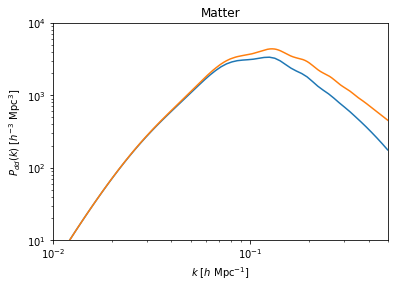

In [11]:
plt.loglog(zelda.pktable_dd[:,0], zelda.pktable_dd[:,1], label='Zel')
plt.loglog(zelda.kint, (1 + f*nu**2)**2 * zelda.plins['dd'],label='Lin')

plt.xlim(1e-2, 0.5)
plt.ylim(1e1, 1e4)

plt.xlabel(r'$k$ [$h$ Mpc$^{-1}$]')
plt.ylabel(r'$P_{dd}(k)$ [$h^{-3}$ Mpc$^{3}$]')
plt.title("Matter")

plt.show()